In [1]:
import mne
raw = mne.io.read_raw_edf('Traces.edf', preload=True)
raw

Extracting EDF parameters from G:\다른 컴퓨터\lenovo (1)\USC\code_mine\yasa_examination\Traces.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


C:\Users\CYS\AppData\Local\Temp/ipykernel_22316/787237926.py:2: RuntimeWarning: Channel names are not unique, found duplicates for: {'ROC', 'LOC'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf('Traces.edf', preload=True)
C:\Users\CYS\AppData\Local\Temp/ipykernel_22316/787237926.py:2: RuntimeWarning: Scaling factor is not defined in following channels:
Flattening, Pleth Amplitude, Chin, L-Leg, EKG, R-Leg, SO, LOC-0, LOC-1, ROC-0, ROC-1, A1, C3, C3-A2, C4, C4-A1, A2, O1, O1-A2, O2, O2-A1, IO, F3, F3-A2, F4, F4-A1, Light_BU, Nasal Pressure, Thermistor, Snoring Sensor, Thorax, Abdomen, Gravity X, Gravity Y, Plethysmogram, Pulse, RD-Quality, SpO2, SpO2 BB, Heart Rate_DR, SpO2-Quality_DR, Flow_DR, Snore_DR, Activity_DR, Elevation_DR, Position_DR, Phase_DR, RMI_DR, RR_DR, XSum_DR, Tidal Volume_DR, XFlow_DR
  raw = mne.io.read_raw_edf('Traces.edf', preload=True)


Reading 0 ... 11184999  =      0.000 ... 22369.998 secs...


<RawEDF | Traces.edf, 52 x 11185000 (22370.0 s), ~4.33 GB, data loaded>

In [2]:
print(raw.ch_names)

['Flattening', 'Pleth Amplitude', 'Chin', 'L-Leg', 'EKG', 'R-Leg', 'SO', 'LOC-0', 'LOC-1', 'ROC-0', 'ROC-1', 'A1', 'C3', 'C3-A2', 'C4', 'C4-A1', 'A2', 'O1', 'O1-A2', 'O2', 'O2-A1', 'IO', 'F3', 'F3-A2', 'F4', 'F4-A1', 'Light_BU', 'Nasal Pressure', 'Thermistor', 'Snoring Sensor', 'Thorax', 'Abdomen', 'Gravity X', 'Gravity Y', 'Plethysmogram', 'Pulse', 'RD-Quality', 'SpO2', 'SpO2 BB', 'Heart Rate_DR', 'SpO2-Quality_DR', 'Flow_DR', 'Snore_DR', 'Activity_DR', 'Elevation_DR', 'Position_DR', 'Phase_DR', 'RMI_DR', 'RR_DR', 'XSum_DR', 'Tidal Volume_DR', 'XFlow_DR']


In [3]:
# remove the EOG, EMG, and EKG channels
# raw.drop_channels(['ROC-A1', 'LOC-A2', 'EMG1-EMG2', 'EKG-R-EKG-L'])
raw.pick_channels(['C4-A1'])
chan = raw.ch_names
print(chan)

['C4-A1']


In [4]:
# Downsampling and filtering
print(raw.info['sfreq'])

500.0


In [5]:
raw.resample(100)
sf = raw.info['sfreq']
sf

100.0

In [6]:
# 0.3-45 Hz bandpass-filter
raw.filter(0.3, 45)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 1101 samples (11.010 sec)



<RawEDF | Traces.edf, 1 x 2237000 (22370.0 s), ~17.1 MB, data loaded>

In [7]:
data = raw.get_data() * 1e6
print(data.shape)

(1, 2237000)


In [8]:
# Hynogram
import pandas as pd
hypno = pd.read_csv("test_hypno.csv", squeeze=True)
hypno

0      0
1      0
2      0
3      2
4      0
      ..
689    3
690    3
691    3
692    0
693    0
Name: stages, Length: 694, dtype: int64

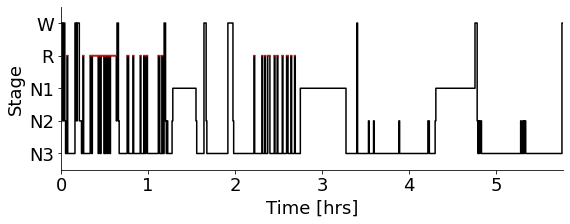

In [9]:
import yasa
yasa.plot_hypnogram(hypno);

In [10]:
# sleep statistics and stage-transition matrix
yasa.sleep_statistics(hypno, sf_hyp=1/30)

{'TIB': 347.0,
 'SPT': 344.5,
 'WASO': 12.5,
 'TST': 332.0,
 'N1': 74.5,
 'N2': 14.0,
 'N3': 216.5,
 'REM': 27.0,
 'NREM': 305.0,
 'SOL': 1.5,
 'Lat_N1': 77.5,
 'Lat_N2': 1.5,
 'Lat_N3': 3.5,
 'Lat_REM': 4.5,
 '%N1': 22.43975903614458,
 '%N2': 4.216867469879518,
 '%N3': 65.21084337349397,
 '%REM': 8.132530120481928,
 '%NREM': 91.86746987951807,
 'SE': 95.67723342939482,
 'SME': 96.37155297532657}

In [11]:
counts, probs = yasa.transition_matrix(hypno)
probs.round(3)

To Stage,0,1,2,3,4
From Stage,,,,,
0,0.655,0.000,0.310,0.034,0.000
1,0.007,0.980,0.007,0.007,0.000
2,0.107,0.071,0.179,0.643,0.000
3,0.014,0.002,0.028,0.894,0.062
4,0.000,0.000,0.019,0.481,0.500


In [12]:
# Spectral analyses
# Full-night spectrogram plot

In [13]:
hypno_up = yasa.hypno_upsample_to_data(hypno, sf_hypno=1/30, data=raw)
print(len(hypno_up))

29-Mar-22 09:34:06 | WARNING | Hypnogram is SHORTER than data by 1550.00 seconds. Padding hypnogram with last value to match data.size.


2237000


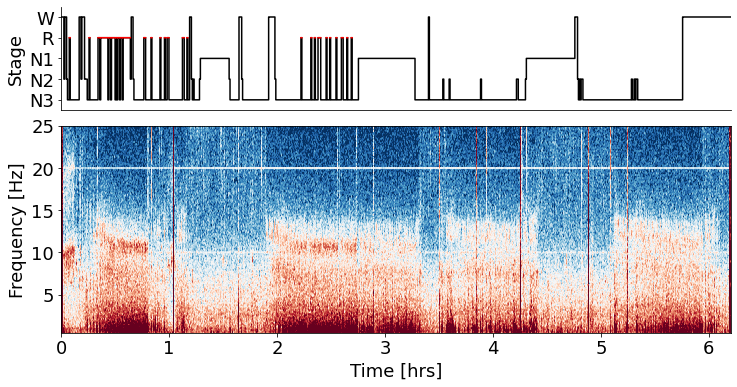

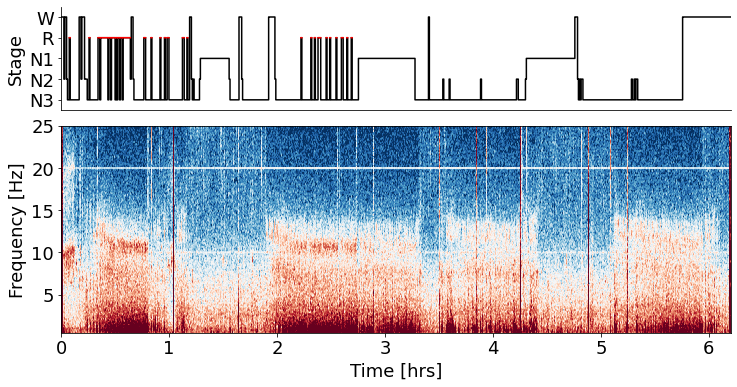

In [14]:
# we select only the C$-A1 EEG channel
yasa.plot_spectrogram(data[chan.index("C4-A1")], sf, hypno_up)

29-Mar-22 09:34:09 | INFO | Using pre-trained classifier: C:\Users\CYS\anaconda3\lib\site-packages\yasa\classifiers\clf_eeg_lgb_0.5.0.joblib


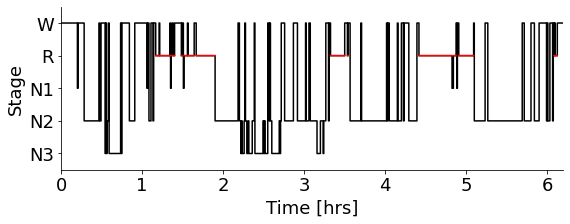

In [15]:
# automatic sleep staging
sls = yasa.SleepStaging(raw, eeg_name='C4-A1')
hypno_pred = sls.predict()  # Predict the sleep stages
hypno_pred = yasa.hypno_str_to_int(hypno_pred)  # Convert "W" to 0, "N1" to 1, etc
yasa.plot_hypnogram(hypno_pred);  # Plot

In [16]:
from sklearn.metrics import accuracy_score
print(f"The accuracy is {100 * accuracy_score(hypno, hypno_pred):.3f}%")

ValueError: Found input variables with inconsistent numbers of samples: [694, 745]